MODELING CUSTOMER SATISFACTION FROM ONLINE REVIEW BY INTERPRETATIVE MAHCINE LEARNING AND KANO MODEL

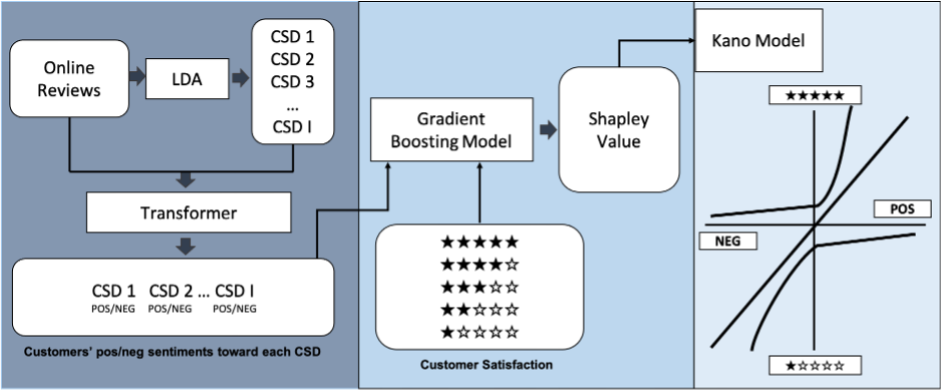

PART 1. Data Load & NLP Preprocessing

In [1]:
# import packages

import re
import time
from bs4 import BeautifulSoup as bs
import os
from datetime import datetime
import numpy as np
import pandas as pd
import xlwt
from google.colab import drive
import nltk
nltk.download('stopwords')
from collections import defaultdict
from nltk.corpus import stopwords
from gensim import corpora
from gensim.models import LdaModel
from nltk import sent_tokenize
nltk.download("punkt")
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [2]:
# Connect Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Upload data from Google Drive

path_apple3_38 = '/content/drive/MyDrive/smartwatch/Apple Watch Series 3 (GPS + Cellular, 38mm) - Silver Aluminum Case with White Sport Band.csv'
path_apple3_42 = '/content/drive/MyDrive/smartwatch/Apple Watch Series 3 (GPS, 42MM) - Space Gray Aluminum Case with Black Sport Band (Renewed).csv'
path_appleSE = '/content/drive/MyDrive/smartwatch/New Apple Watch SE (GPS, 40mm) - Silver Aluminum Case with White Sport Band.csv'
path_apple6 = '/content/drive/MyDrive/smartwatch/New Apple Watch Series 6 (GPS, 40mm) - Blue Aluminum Case with Deep Navy Sport Band.csv'
path_fitbit_versa2 = '/content/drive/MyDrive/smartwatch/Fitbit Versa 2 Health and Fitness Smartwatch with Heart Rate, Music, Alexa Built-In, Sleep and Swim Tracking.csv'
path_fitbit_versa3 = '/content/drive/MyDrive/smartwatch/Fitbit Versa 3 Health & Fitness Smartwatch with GPS.csv'
path_letsfit1 = '/content/drive/MyDrive/smartwatch/Letsfit Smart Watch for Android Phones Compatible with iPhone Samsung, Fitness Tracker with Blood Oxygen Saturation & Heart Rate Monitor, IP68 Waterproof Cardio Watch for Women Men, Black.csv'
path_letsfit1_health = '/content/drive/MyDrive/smartwatch/Letsfit Smart Watch, Fitness Tracker with Heart Rate Monitor, Activity Tracker with 1.3 Inch Touch Screen, IP68 Waterproof Pedometer Smartwatch with Sleep Monitor, Step Counter for Women and Men.csv'
path_ss_fit2 = '/content/drive/MyDrive/smartwatch/SAMSUNG Galaxy Fit 2 Bluetooth Fitness Tracking Smart Band – Black (US Version).csv'
path_ss_fit = '/content/drive/MyDrive/smartwatch/Samsung Galaxy Fit Black (Bluetooth), SM-R370NZKAXAR – US Version with Warranty.csv'
path_ss_galaxy = '/content/drive/MyDrive/smartwatch/Samsung Galaxy Watch (42mm, GPS, Bluetooth, Unlocked LTE) – Midnight Black (US Version).csv'
path_ss_galaxy3 = '/content/drive/MyDrive/smartwatch/SAMSUNG Galaxy Watch 3 (45mm, GPS, Bluetooth) Smart Watch with Advanced Health Monitoring, Fitness Tracking, and Long lasting Battery - Mystic Silver (US Version).csv'
path_ss_active2 = '/content/drive/MyDrive/smartwatch/SAMSUNG Galaxy Watch Active 2 (40mm, GPS, Bluetooth) Smart Watch with Advanced Health Monitoring, Fitness Tracking, and Long lasting Battery, Silver (US Version).csv'
path_ss_galaxy_us = '/content/drive/MyDrive/smartwatch/Samsung Galaxy Watch SilverBlack (US Version).csv'
path_ss_gear3 = '/content/drive/MyDrive/smartwatch/Samsung Gear S3 Frontier Smartwatch (Bluetooth), SM-R760NDAAXAR.csv'
path_ss_gear = '/content/drive/MyDrive/smartwatch/Samsung Gear Sport Smartwatch (Bluetooth), Black, SM-R600NZKAXAR – US Version with Warranty.csv'
path_willful1 = '/content/drive/MyDrive/smartwatch/Willful Smart Watch for Android Phones and iOS Phones Compatible iPhone Samsung, IP68 Swimming Waterproof Smartwatch Fitness Tracker Fitness Watch Heart Rate Monitor Watches for Women (Dark Purple).csv'
apple3_38 = pd.read_csv(path_apple3_38, parse_dates= ['Date'])
apple3_42 = pd.read_csv(path_apple3_42, parse_dates= ['Date'])
appleSE = pd.read_csv(path_appleSE, parse_dates= ['Date'])
apple6 = pd.read_csv(path_apple6, parse_dates= ['Date'])
fitbit_versa2 = pd.read_csv(path_fitbit_versa2, parse_dates= ['Date'])
fitbit_versa3 = pd.read_csv(path_fitbit_versa3, parse_dates= ['Date'])
letsfit1 = pd.read_csv(path_letsfit1, parse_dates= ['Date'])
letsfit1_health = pd.read_csv(path_letsfit1_health, parse_dates= ['Date'])
ss_fit2 = pd.read_csv(path_ss_fit2, parse_dates= ['Date'])
ss_fit = pd.read_csv(path_ss_fit, parse_dates= ['Date'])
ss_galaxy = pd.read_csv(path_ss_galaxy, parse_dates= ['Date'])
ss_galaxy3 = pd.read_csv(path_ss_galaxy3, parse_dates= ['Date'])
ss_active2 = pd.read_csv(path_ss_active2, parse_dates= ['Date'])
ss_galaxy_us = pd.read_csv(path_ss_galaxy_us, parse_dates= ['Date'])
ss_gear3 = pd.read_csv(path_ss_gear3, parse_dates= ['Date'])
ss_gear = pd.read_csv(path_ss_gear, parse_dates= ['Date'])
willful1 = pd.read_csv(path_willful1, parse_dates= ['Date'])

all_data = pd.concat([apple3_38, apple3_42,appleSE, apple6, fitbit_versa2, fitbit_versa3, letsfit1, letsfit1_health, ss_fit2,
                      ss_fit, ss_galaxy, ss_galaxy3, ss_active2, ss_galaxy_us, ss_gear3, ss_gear, willful1])

In [4]:
# Check data
all_data['Product_Name'].value_counts()

Willful Smart Watch for Android Phones and iOS Phones Compatible iPhone Samsung, IP68 Swimming Waterproof Smartwatch Fitness Tracker Fitness Watch Heart Rate Monitor Watches for Women (Dark Purple)    5000
Fitbit Versa 2 Health and Fitness Smartwatch with Heart Rate, Music, Alexa Built-In, Sleep and Swim Tracking, Black/Carbon, One Size (S and L Bands Included)                                            5000
Letsfit Smart Watch, Fitness Tracker with Heart Rate Monitor, Activity Tracker with 1.3 Inch Touch Screen, IP68 Waterproof Pedometer Smartwatch with Sleep Monitor, Step Counter for Women and Men       5000
Samsung Gear S3 Frontier Smartwatch (Bluetooth), SM-R760NDAAXAR                                                                                                                                          4130
Samsung Galaxy Watch (46mm, GPS, Bluetooth, Unlocked LTE) – Silver/Black (US Version)                                                                                           

In [5]:
# Integrate review title with review content
all_data['Title'] = all_data['Title'] + '.'
all_data['Review'] = all_data['Title'] + ' ' + all_data['Body']
all_data.reset_index(drop = True, inplace = True)
all_data

,Product_Name,Date,Rating,Verified_Purchase,Helpful,Options,Region,Title,Body,Link,Review
0,"Apple Watch Series 3 (GPS + Cellular, 38mm) - ...",2018-12-26,1,Size: 38 mmColor: Silver Aluminum with White S...,364.0,Size: 38 mmColor: Silver Aluminum with White S...,United States,Screen came completely off.,the day after giving this watch as a Christmas...,https://www.amazon.com/Apple-Watch-GPS-Cellula...,Screen came completely off. the day after givi...
1,"Apple Watch Series 3 (GPS + Cellular, 38mm) - ...",2018-12-20,5,Size: 42 mmColor: Silver Aluminum with White S...,263.0,Size: 42 mmColor: Silver Aluminum with White S...,United States,Great Product.,Great product ! came as expected in official a...,https://www.amazon.com/Apple-Watch-GPS-Cellula...,Great Product. Great product ! came as expecte...
2,"Apple Watch Series 3 (GPS + Cellular, 38mm) - ...",2018-12-26,5,Size: 42 mmColor: Space Gray Aluminum with Bla...,181.0,Size: 42 mmColor: Space Gray Aluminum with Bla...,United States,Great gift with one MAJOR exception - you must...,This was what my daughter wanted for Christmas...,https://www.amazon.com/Apple-Watch-GPS-Cellula...,Great gift with one MAJOR exception - you must...
3,"Apple Watch Series 3 (GPS + Cellular, 38mm) - ...",2019-04-11,5,Size: 38 mmColor: Silver Aluminum with White S...,131.0,Size: 38 mmColor: Silver Aluminum with White S...,United States,Love love love it.,I received my Apple Watch next day! Free shipp...,https://www.amazon.com/Apple-Watch-GPS-Cellula...,Love love love it. I received my Apple Watch n...
4,"Apple Watch Series 3 (GPS + Cellular, 38mm) - ...",2018-11-27,5,Size: 38 mmColor: Space Gray Aluminum with Bla...,134.0,Size: 38 mmColor: Space Gray Aluminum with Bla...,United States,"Couldn't believe the deal. iWatch 3, GPS with ...","Couldn't believe the deal. iWatch 3, GPS with ...",https://www.amazon.com/Apple-Watch-GPS-Cellula...,"Couldn't believe the deal. iWatch 3, GPS with ..."
...,...,...,...,...,...,...,...,...,...,...,...
38284,Willful Smart Watch for Android Phones and iOS...,2021-04-05,4,Color: Dark PurpleVerified Purchase,NaN,Color: Dark Purple,United States,Some issues but overall great!.,This is a great watch! I have been having trou...,https://www.amazon.com/Willful-Compatible-Swim...,Some issues but overall great!. This is a grea...
38285,Willful Smart Watch for Android Phones and iOS...,2020-08-10,5,Color: PinkVerified Purchase,NaN,Color: Pink,United States,you will be satisfied.,Love 💘 this watch especially the duration of t...,https://www.amazon.com/Willful-Compatible-Swim...,you will be satisfied. Love 💘 this watch espec...
38286,Willful Smart Watch for Android Phones and iOS...,2021-03-06,5,Color: BlackVerified Purchase,NaN,Color: Black,United States,The price is just right..,got this for my wife and she loves it. Happy w...,https://www.amazon.com/Willful-Compatible-Swim...,The price is just right.. got this for my wife...
38287,Willful Smart Watch for Android Phones and iOS...,2021-02-28,3,Color: PinkVerified Purchase,NaN,Color: Pink,United States,Dont like the band.,The band changes colors. Now it looks dirty. I...,https://www.amazon.com/Willful-Compatible-Swim...,Dont like the band. The band changes colors. N...


In [6]:
# Remove Emoji
def rmEmoji(inputData):
    return inputData.encode('utf-8', 'ignore').decode('utf-8')

In [7]:
nan_index = []
for i in range(len(all_data['Review'])):
  try:
    all_data['Review'][i] = rmEmoji(all_data['Review'][i])
  except:
    nan_index.append(i)
all_data = all_data.drop(nan_index, axis = 0)
all_data.reset_index(drop = True, inplace = True)
all_data.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Product_Name,Date,Rating,Verified_Purchase,Helpful,Options,Region,Title,Body,Link,Review
0,"Apple Watch Series 3 (GPS + Cellular, 38mm) - ...",2018-12-26,1,Size: 38 mmColor: Silver Aluminum with White S...,364.0,Size: 38 mmColor: Silver Aluminum with White S...,United States,Screen came completely off.,the day after giving this watch as a Christmas...,https://www.amazon.com/Apple-Watch-GPS-Cellula...,Screen came completely off. the day after givi...
1,"Apple Watch Series 3 (GPS + Cellular, 38mm) - ...",2018-12-20,5,Size: 42 mmColor: Silver Aluminum with White S...,263.0,Size: 42 mmColor: Silver Aluminum with White S...,United States,Great Product.,Great product ! came as expected in official a...,https://www.amazon.com/Apple-Watch-GPS-Cellula...,Great Product. Great product ! came as expecte...
2,"Apple Watch Series 3 (GPS + Cellular, 38mm) - ...",2018-12-26,5,Size: 42 mmColor: Space Gray Aluminum with Bla...,181.0,Size: 42 mmColor: Space Gray Aluminum with Bla...,United States,Great gift with one MAJOR exception - you must...,This was what my daughter wanted for Christmas...,https://www.amazon.com/Apple-Watch-GPS-Cellula...,Great gift with one MAJOR exception - you must...
3,"Apple Watch Series 3 (GPS + Cellular, 38mm) - ...",2019-04-11,5,Size: 38 mmColor: Silver Aluminum with White S...,131.0,Size: 38 mmColor: Silver Aluminum with White S...,United States,Love love love it.,I received my Apple Watch next day! Free shipp...,https://www.amazon.com/Apple-Watch-GPS-Cellula...,Love love love it. I received my Apple Watch n...
4,"Apple Watch Series 3 (GPS + Cellular, 38mm) - ...",2018-11-27,5,Size: 38 mmColor: Space Gray Aluminum with Bla...,134.0,Size: 38 mmColor: Space Gray Aluminum with Bla...,United States,"Couldn't believe the deal. iWatch 3, GPS with ...","Couldn't believe the deal. iWatch 3, GPS with ...",https://www.amazon.com/Apple-Watch-GPS-Cellula...,"Couldn't believe the deal. iWatch 3, GPS with ..."
5,"Apple Watch Series 3 (GPS + Cellular, 38mm) - ...",2018-12-30,5,Size: 38 mmColor: Silver Aluminum with White S...,104.0,Size: 38 mmColor: Silver Aluminum with White S...,United States,Upgrade from 42 gen 1.,I prefer the feminine look of the smaller 38 t...,https://www.amazon.com/Apple-Watch-GPS-Cellula...,Upgrade from 42 gen 1. I prefer the feminine l...
6,"Apple Watch Series 3 (GPS + Cellular, 38mm) - ...",2018-12-06,4,Size: 42 mmColor: Space Gray Aluminum with Bla...,84.0,Size: 42 mmColor: Space Gray Aluminum with Bla...,United States,Great watch.,"Love my new watch! I can answer texts , play g...",https://www.amazon.com/Apple-Watch-GPS-Cellula...,Great watch. Love my new watch! I can answer t...
7,"Apple Watch Series 3 (GPS + Cellular, 38mm) - ...",2018-12-10,5,Size: 42 mmColor: Space Gray Aluminum with Bla...,81.0,Size: 42 mmColor: Space Gray Aluminum with Bla...,United States,It does what it is supposed to do..,Great watch. 42 mm is not too big for females...,https://www.amazon.com/Apple-Watch-GPS-Cellula...,It does what it is supposed to do.. Great watc...
8,"Apple Watch Series 3 (GPS + Cellular, 38mm) - ...",2019-01-15,1,Size: 38 mmColor: Silver Aluminum with White S...,26.0,Size: 38 mmColor: Silver Aluminum with White S...,United States,Will not hold a charge.,Purchased for my daughter for a Christmas gift...,https://www.amazon.com/Apple-Watch-GPS-Cellula...,Will not hold a charge. Purchased for my daugh...
9,"Apple Watch Series 3 (GPS + Cellular, 38mm) - ...",2019-02-11,1,Size: 38 mmColor: Silver Aluminum with White S...,27.0,Size: 38 mmColor: Silver Aluminum with White S...,United States,Apple Watch Series 3.,WORST experience EVER!!!! I ordered the Series...,https://www.amazon.com/Apple-Watch-GPS-Cellula...,Apple Watch Series 3. WORST experience EVER!!!...


**PART 2. Sentiment Analysis (Pos & Neg) **굵은 텍스트**


In [8]:
# Upload train set with answer coded for sentiment analysis
all_data2 = pd.read_csv('/content/drive/MyDrive/smartwatch/smartwatch_all_data (2).csv', parse_dates= ['Date'], encoding = 'cp949')
all_data2

,index,Product_Name,Date,Rating,Verified_Purchase,Helpful,Options,Region,Title,Body,Link,Review,Sentiment_null,Sentiment
0,0,"Apple Watch Series 3 (GPS + Cellular, 38mm) - ...",2018-12-26,1,Size: 38 mmColor: Silver Aluminum with White S...,364.0,Size: 38 mmColor: Silver Aluminum with White S...,United States,Screen came completely off,the day after giving this watch as a Christmas...,https://www.amazon.com/Apple-Watch-GPS-Cellula...,Screen came completely off the day after givin...,3,NaN
1,1,"Apple Watch Series 3 (GPS + Cellular, 38mm) - ...",2018-12-20,5,Size: 42 mmColor: Silver Aluminum with White S...,263.0,Size: 42 mmColor: Silver Aluminum with White S...,United States,Great Product,Great product ! came as expected in official a...,https://www.amazon.com/Apple-Watch-GPS-Cellula...,Great Product Great product ! came as expected...,3,NaN
2,2,"Apple Watch Series 3 (GPS + Cellular, 38mm) - ...",2018-12-26,5,Size: 42 mmColor: Space Gray Aluminum with Bla...,181.0,Size: 42 mmColor: Space Gray Aluminum with Bla...,United States,Great gift with one MAJOR exception - you must...,This was what my daughter wanted for Christmas...,https://www.amazon.com/Apple-Watch-GPS-Cellula...,Great gift with one MAJOR exception - you must...,3,NaN
3,3,"Apple Watch Series 3 (GPS + Cellular, 38mm) - ...",2019-04-11,5,Size: 38 mmColor: Silver Aluminum with White S...,131.0,Size: 38 mmColor: Silver Aluminum with White S...,United States,Love love love it,I received my Apple Watch next day! Free shipp...,https://www.amazon.com/Apple-Watch-GPS-Cellula...,Love love love it I received my Apple Watch ne...,3,1.0
4,4,"Apple Watch Series 3 (GPS + Cellular, 38mm) - ...",2018-11-27,5,Size: 38 mmColor: Space Gray Aluminum with Bla...,134.0,Size: 38 mmColor: Space Gray Aluminum with Bla...,United States,"Couldn't believe the deal. iWatch 3, GPS with ...","Couldn't believe the deal. iWatch 3, GPS with ...",https://www.amazon.com/Apple-Watch-GPS-Cellula...,"Couldn't believe the deal. iWatch 3, GPS with ...",3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38269,38269,Willful Smart Watch for Android Phones and iOS...,2021-04-05,4,Color: Dark PurpleVerified Purchase,NaN,Color: Dark Purple,United States,Some issues but overall great!,This is a great watch! I have been having trou...,https://www.amazon.com/Willful-Compatible-Swim...,Some issues but overall great! This is a great...,3,NaN
38270,38270,Willful Smart Watch for Android Phones and iOS...,2020-08-10,5,Color: PinkVerified Purchase,NaN,Color: Pink,United States,you will be satisfied,Love _ this watch especially the duration of t...,https://www.amazon.com/Willful-Compatible-Swim...,you will be satisfied Love _ this watch especi...,3,NaN
38271,38271,Willful Smart Watch for Android Phones and iOS...,2021-03-06,5,Color: BlackVerified Purchase,NaN,Color: Black,United States,The price is just right.,got this for my wife and she loves it. Happy w...,https://www.amazon.com/Willful-Compatible-Swim...,The price is just right. got this for my wife ...,3,NaN
38272,38272,Willful Smart Watch for Android Phones and iOS...,2021-02-28,3,Color: PinkVerified Purchase,NaN,Color: Pink,United States,Dont like the band,The band changes colors. Now it looks dirty. I...,https://www.amazon.com/Willful-Compatible-Swim...,Dont like the band The band changes colors. No...,3,NaN


In [9]:
# Check sentiment value
all_data2['Sentiment'].value_counts()

1.0    499
0.0    396
5.0     64
Name: Sentiment, dtype: int64

In [10]:
# Merge Anser value to origin data
all_data['Sentiment'] = all_data2['Sentiment']

In [11]:
# Eliminate reviews written in other languages (only English)
all_data_lang = all_data[all_data['Sentiment'] == 5].index
all_data = all_data.drop(all_data_lang, axis = 0)
all_data.reset_index(drop = True, inplace = True)
all_data

,Product_Name,Date,Rating,Verified_Purchase,Helpful,Options,Region,Title,Body,Link,Review,Sentiment
0,"Apple Watch Series 3 (GPS + Cellular, 38mm) - ...",2018-12-26,1,Size: 38 mmColor: Silver Aluminum with White S...,364.0,Size: 38 mmColor: Silver Aluminum with White S...,United States,Screen came completely off.,the day after giving this watch as a Christmas...,https://www.amazon.com/Apple-Watch-GPS-Cellula...,Screen came completely off. the day after givi...,NaN
1,"Apple Watch Series 3 (GPS + Cellular, 38mm) - ...",2018-12-20,5,Size: 42 mmColor: Silver Aluminum with White S...,263.0,Size: 42 mmColor: Silver Aluminum with White S...,United States,Great Product.,Great product ! came as expected in official a...,https://www.amazon.com/Apple-Watch-GPS-Cellula...,Great Product. Great product ! came as expecte...,NaN
2,"Apple Watch Series 3 (GPS + Cellular, 38mm) - ...",2018-12-26,5,Size: 42 mmColor: Space Gray Aluminum with Bla...,181.0,Size: 42 mmColor: Space Gray Aluminum with Bla...,United States,Great gift with one MAJOR exception - you must...,This was what my daughter wanted for Christmas...,https://www.amazon.com/Apple-Watch-GPS-Cellula...,Great gift with one MAJOR exception - you must...,NaN
3,"Apple Watch Series 3 (GPS + Cellular, 38mm) - ...",2019-04-11,5,Size: 38 mmColor: Silver Aluminum with White S...,131.0,Size: 38 mmColor: Silver Aluminum with White S...,United States,Love love love it.,I received my Apple Watch next day! Free shipp...,https://www.amazon.com/Apple-Watch-GPS-Cellula...,Love love love it. I received my Apple Watch n...,1.0
4,"Apple Watch Series 3 (GPS + Cellular, 38mm) - ...",2018-11-27,5,Size: 38 mmColor: Space Gray Aluminum with Bla...,134.0,Size: 38 mmColor: Space Gray Aluminum with Bla...,United States,"Couldn't believe the deal. iWatch 3, GPS with ...","Couldn't believe the deal. iWatch 3, GPS with ...",https://www.amazon.com/Apple-Watch-GPS-Cellula...,"Couldn't believe the deal. iWatch 3, GPS with ...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
38205,Willful Smart Watch for Android Phones and iOS...,2021-04-05,4,Color: Dark PurpleVerified Purchase,NaN,Color: Dark Purple,United States,Some issues but overall great!.,This is a great watch! I have been having trou...,https://www.amazon.com/Willful-Compatible-Swim...,Some issues but overall great!. This is a grea...,NaN
38206,Willful Smart Watch for Android Phones and iOS...,2020-08-10,5,Color: PinkVerified Purchase,NaN,Color: Pink,United States,you will be satisfied.,Love 💘 this watch especially the duration of t...,https://www.amazon.com/Willful-Compatible-Swim...,you will be satisfied. Love 💘 this watch espec...,NaN
38207,Willful Smart Watch for Android Phones and iOS...,2021-03-06,5,Color: BlackVerified Purchase,NaN,Color: Black,United States,The price is just right..,got this for my wife and she loves it. Happy w...,https://www.amazon.com/Willful-Compatible-Swim...,The price is just right.. got this for my wife...,NaN
38208,Willful Smart Watch for Android Phones and iOS...,2021-02-28,3,Color: PinkVerified Purchase,NaN,Color: Pink,United States,Dont like the band.,The band changes colors. Now it looks dirty. I...,https://www.amazon.com/Willful-Compatible-Swim...,Dont like the band. The band changes colors. N...,NaN


In [12]:
#Subsitute nan value to 2
#test셋 분리하기 위해 nan값 2로 대체
all_data['Sentiment'] = all_data['Sentiment'].fillna(2)

In [13]:
all_data_pro = all_data[all_data['Sentiment'] == 1]
all_data_con = all_data[all_data['Sentiment'] == 0]

In [14]:
# Split train and test set
train = pd.concat([all_data_pro, all_data_con])
train.reset_index(drop = True, inplace = True)
test = all_data[all_data['Sentiment'] == 2]
test.reset_index(drop = True, inplace = True)

In [15]:
train_test = pd.concat([train, test])
train_test.reset_index(drop = True, inplace = True)
try:
  atrain_test = train_test.drop(['index'], axis = 1)
except:
  pass
train_test.reset_index(drop = False, inplace = True)
train_test.rename(columns = {'index' : 'old_index'}, inplace = True)
train_test

,old_index,Product_Name,Date,Rating,Verified_Purchase,Helpful,Options,Region,Title,Body,Link,Review,Sentiment
0,0,"Apple Watch Series 3 (GPS + Cellular, 38mm) - ...",2019-04-11,5,Size: 38 mmColor: Silver Aluminum with White S...,131.0,Size: 38 mmColor: Silver Aluminum with White S...,United States,Love love love it.,I received my Apple Watch next day! Free shipp...,https://www.amazon.com/Apple-Watch-GPS-Cellula...,Love love love it. I received my Apple Watch n...,1.0
1,1,"Apple Watch Series 3 (GPS + Cellular, 38mm) - ...",2018-12-30,5,Size: 38 mmColor: Silver Aluminum with White S...,104.0,Size: 38 mmColor: Silver Aluminum with White S...,United States,Upgrade from 42 gen 1.,I prefer the feminine look of the smaller 38 t...,https://www.amazon.com/Apple-Watch-GPS-Cellula...,Upgrade from 42 gen 1. I prefer the feminine l...,1.0
2,2,"Apple Watch Series 3 (GPS + Cellular, 38mm) - ...",2018-12-06,4,Size: 42 mmColor: Space Gray Aluminum with Bla...,84.0,Size: 42 mmColor: Space Gray Aluminum with Bla...,United States,Great watch.,"Love my new watch! I can answer texts , play g...",https://www.amazon.com/Apple-Watch-GPS-Cellula...,Great watch. Love my new watch! I can answer t...,1.0
3,3,"Apple Watch Series 3 (GPS + Cellular, 38mm) - ...",2018-12-10,5,Size: 42 mmColor: Space Gray Aluminum with Bla...,81.0,Size: 42 mmColor: Space Gray Aluminum with Bla...,United States,It does what it is supposed to do..,Great watch. 42 mm is not too big for females...,https://www.amazon.com/Apple-Watch-GPS-Cellula...,It does what it is supposed to do.. Great watc...,1.0
4,4,"Apple Watch Series 3 (GPS + Cellular, 38mm) - ...",2019-11-12,5,Size: 38 mmColor: Silver Aluminum with White S...,3.0,Size: 38 mmColor: Silver Aluminum with White S...,United States,Still relevant in late 2019. Still the highest...,My wife accidentally dropped a huge metal stat...,https://www.amazon.com/Apple-Watch-GPS-Cellula...,Still relevant in late 2019. Still the highest...,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38205,38205,Willful Smart Watch for Android Phones and iOS...,2021-04-05,4,Color: Dark PurpleVerified Purchase,NaN,Color: Dark Purple,United States,Some issues but overall great!.,This is a great watch! I have been having trou...,https://www.amazon.com/Willful-Compatible-Swim...,Some issues but overall great!. This is a grea...,2.0
38206,38206,Willful Smart Watch for Android Phones and iOS...,2020-08-10,5,Color: PinkVerified Purchase,NaN,Color: Pink,United States,you will be satisfied.,Love 💘 this watch especially the duration of t...,https://www.amazon.com/Willful-Compatible-Swim...,you will be satisfied. Love 💘 this watch espec...,2.0
38207,38207,Willful Smart Watch for Android Phones and iOS...,2021-03-06,5,Color: BlackVerified Purchase,NaN,Color: Black,United States,The price is just right..,got this for my wife and she loves it. Happy w...,https://www.amazon.com/Willful-Compatible-Swim...,The price is just right.. got this for my wife...,2.0
38208,38208,Willful Smart Watch for Android Phones and iOS...,2021-02-28,3,Color: PinkVerified Purchase,NaN,Color: Pink,United States,Dont like the band.,The band changes colors. Now it looks dirty. I...,https://www.amazon.com/Willful-Compatible-Swim...,Dont like the band. The band changes colors. N...,2.0


In [16]:
#@title
# Split reviews into sentence units to identity several CSDs and their sentiment seperately
# #문장 단위 나누기
# df_sentence = pd.DataFrame()
# #for i in range()len(train_test)):
# for i in range(0, 10000):
#   if i % 100 == 0:
#     print(i)
#   #print('i = ', i)
#   sentence_list = re.split('[.!?;]', train_test['Review'][i])
#   row = train_test.iloc[i]
#   for j in range(len(sentence_list)):
#     #print('j = ', j)
#     df_sentence = df_sentence.append(row, ignore_index= True)
#     #print(len(df_sentence)-1, ' ', j)
#     #print(a[j])
#     df_sentence.loc[len(df_sentence)-1, 'Review'] = sentence_list[j]

In [17]:
#@title
# df_sentence.to_csv('/content/drive/MyDrive/smartwatch/df_sentence1.csv', index = 0)


In [18]:
#@title
# train.to_csv('/content/drive/MyDrive/smartwatch/smartwatch_train.csv', index = 0)
# test.to_csv('/content/drive/MyDrive/smartwatch/smartwatch_test.csv', index = 0)

In [19]:
# upload sentiment unit reviews
all_data_sentence1 = pd.read_csv('/content/drive/MyDrive/smartwatch/df_sentence1.csv', parse_dates= ['Date'])
all_data_sentence2 = pd.read_csv('/content/drive/MyDrive/smartwatch/df_sentence2.csv', parse_dates= ['Date'])
all_data_sentence3 = pd.read_csv('/content/drive/MyDrive/smartwatch/df_sentence3.csv', parse_dates= ['Date'])
all_data_sentence4 = pd.read_csv('/content/drive/MyDrive/smartwatch/df_sentence4.csv', parse_dates= ['Date'])

In [20]:
all_data_sentence = pd.concat([all_data_sentence1, all_data_sentence2, all_data_sentence3, all_data_sentence4])
all_data_sentence.reset_index(drop = True, inplace = True)
all_data_sentence

,Body,Date,Helpful,Link,Options,Product_Name,Rating,Region,Review,Sentiment,Title,Verified_Purchase,old_index
0,I received my Apple Watch next day! Free shipp...,2019-04-11,131.0,https://www.amazon.com/Apple-Watch-GPS-Cellula...,Size: 38 mmColor: Silver Aluminum with White S...,"Apple Watch Series 3 (GPS + Cellular, 38mm) - ...",5.0,United States,Love love love it,1.0,Love love love it..,Size: 38 mmColor: Silver Aluminum with White S...,0.0
1,I received my Apple Watch next day! Free shipp...,2019-04-11,131.0,https://www.amazon.com/Apple-Watch-GPS-Cellula...,Size: 38 mmColor: Silver Aluminum with White S...,"Apple Watch Series 3 (GPS + Cellular, 38mm) - ...",5.0,United States,NaN,1.0,Love love love it..,Size: 38 mmColor: Silver Aluminum with White S...,0.0
2,I received my Apple Watch next day! Free shipp...,2019-04-11,131.0,https://www.amazon.com/Apple-Watch-GPS-Cellula...,Size: 38 mmColor: Silver Aluminum with White S...,"Apple Watch Series 3 (GPS + Cellular, 38mm) - ...",5.0,United States,I received my Apple Watch next day,1.0,Love love love it..,Size: 38 mmColor: Silver Aluminum with White S...,0.0
3,I received my Apple Watch next day! Free shipp...,2019-04-11,131.0,https://www.amazon.com/Apple-Watch-GPS-Cellula...,Size: 38 mmColor: Silver Aluminum with White S...,"Apple Watch Series 3 (GPS + Cellular, 38mm) - ...",5.0,United States,Free shipping,1.0,Love love love it..,Size: 38 mmColor: Silver Aluminum with White S...,0.0
4,I received my Apple Watch next day! Free shipp...,2019-04-11,131.0,https://www.amazon.com/Apple-Watch-GPS-Cellula...,Size: 38 mmColor: Silver Aluminum with White S...,"Apple Watch Series 3 (GPS + Cellular, 38mm) - ...",5.0,United States,New in a sealed box,1.0,Love love love it..,Size: 38 mmColor: Silver Aluminum with White S...,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
308303,I like this product. It's basic which is what ...,2021-03-05,NaN,https://www.amazon.com/Willful-Compatible-Swim...,Color: Purple,Willful Smart Watch for Android Phones and iOS...,5.0,United States,NaN,2.0,Good value..,Color: PurpleVerified Purchase,38209.0
308304,I like this product. It's basic which is what ...,2021-03-05,NaN,https://www.amazon.com/Willful-Compatible-Swim...,Color: Purple,Willful Smart Watch for Android Phones and iOS...,5.0,United States,I like this product,2.0,Good value..,Color: PurpleVerified Purchase,38209.0
308305,I like this product. It's basic which is what ...,2021-03-05,NaN,https://www.amazon.com/Willful-Compatible-Swim...,Color: Purple,Willful Smart Watch for Android Phones and iOS...,5.0,United States,It's basic which is what I need/want,2.0,Good value..,Color: PurpleVerified Purchase,38209.0
308306,I like this product. It's basic which is what ...,2021-03-05,NaN,https://www.amazon.com/Willful-Compatible-Swim...,Color: Purple,Willful Smart Watch for Android Phones and iOS...,5.0,United States,I've recommended it to a couple of my friends,2.0,Good value..,Color: PurpleVerified Purchase,38209.0


In [21]:
# Eliminate empty ('') sentences
# 문장 단위 나눈 후, '' 지우기
nan_index = all_data_sentence[all_data_sentence['Review'].isnull()].index
all_data_sentence.reset_index(drop = True, inplace = True)
nan_index

Int64Index([     1,      9,     11,     16,     18,     23,     25,     26,
                36,     39,
            ...
            308278, 308282, 308284, 308286, 308288, 308289, 308293, 308295,
            308303, 308307],
           dtype='int64', length=97046)

In [22]:
all_data_sentence = all_data_sentence.drop(nan_index, axis = 0)
all_data_sentence.reset_index(drop = True, inplace = True)
all_data_sentence

,Body,Date,Helpful,Link,Options,Product_Name,Rating,Region,Review,Sentiment,Title,Verified_Purchase,old_index
0,I received my Apple Watch next day! Free shipp...,2019-04-11,131.0,https://www.amazon.com/Apple-Watch-GPS-Cellula...,Size: 38 mmColor: Silver Aluminum with White S...,"Apple Watch Series 3 (GPS + Cellular, 38mm) - ...",5.0,United States,Love love love it,1.0,Love love love it..,Size: 38 mmColor: Silver Aluminum with White S...,0.0
1,I received my Apple Watch next day! Free shipp...,2019-04-11,131.0,https://www.amazon.com/Apple-Watch-GPS-Cellula...,Size: 38 mmColor: Silver Aluminum with White S...,"Apple Watch Series 3 (GPS + Cellular, 38mm) - ...",5.0,United States,I received my Apple Watch next day,1.0,Love love love it..,Size: 38 mmColor: Silver Aluminum with White S...,0.0
2,I received my Apple Watch next day! Free shipp...,2019-04-11,131.0,https://www.amazon.com/Apple-Watch-GPS-Cellula...,Size: 38 mmColor: Silver Aluminum with White S...,"Apple Watch Series 3 (GPS + Cellular, 38mm) - ...",5.0,United States,Free shipping,1.0,Love love love it..,Size: 38 mmColor: Silver Aluminum with White S...,0.0
3,I received my Apple Watch next day! Free shipp...,2019-04-11,131.0,https://www.amazon.com/Apple-Watch-GPS-Cellula...,Size: 38 mmColor: Silver Aluminum with White S...,"Apple Watch Series 3 (GPS + Cellular, 38mm) - ...",5.0,United States,New in a sealed box,1.0,Love love love it..,Size: 38 mmColor: Silver Aluminum with White S...,0.0
4,I received my Apple Watch next day! Free shipp...,2019-04-11,131.0,https://www.amazon.com/Apple-Watch-GPS-Cellula...,Size: 38 mmColor: Silver Aluminum with White S...,"Apple Watch Series 3 (GPS + Cellular, 38mm) - ...",5.0,United States,I love it,1.0,Love love love it..,Size: 38 mmColor: Silver Aluminum with White S...,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
211257,The band changes colors. Now it looks dirty. I...,2021-02-28,NaN,https://www.amazon.com/Willful-Compatible-Swim...,Color: Pink,Willful Smart Watch for Android Phones and iOS...,3.0,United States,The mobile app is fitness pro(used by fitbit),2.0,Dont like the band..,Color: PinkVerified Purchase,38208.0
211258,I like this product. It's basic which is what ...,2021-03-05,NaN,https://www.amazon.com/Willful-Compatible-Swim...,Color: Purple,Willful Smart Watch for Android Phones and iOS...,5.0,United States,Good value,2.0,Good value..,Color: PurpleVerified Purchase,38209.0
211259,I like this product. It's basic which is what ...,2021-03-05,NaN,https://www.amazon.com/Willful-Compatible-Swim...,Color: Purple,Willful Smart Watch for Android Phones and iOS...,5.0,United States,I like this product,2.0,Good value..,Color: PurpleVerified Purchase,38209.0
211260,I like this product. It's basic which is what ...,2021-03-05,NaN,https://www.amazon.com/Willful-Compatible-Swim...,Color: Purple,Willful Smart Watch for Android Phones and iOS...,5.0,United States,It's basic which is what I need/want,2.0,Good value..,Color: PurpleVerified Purchase,38209.0


In [23]:
test = all_data_sentence
test

,Body,Date,Helpful,Link,Options,Product_Name,Rating,Region,Review,Sentiment,Title,Verified_Purchase,old_index
0,I received my Apple Watch next day! Free shipp...,2019-04-11,131.0,https://www.amazon.com/Apple-Watch-GPS-Cellula...,Size: 38 mmColor: Silver Aluminum with White S...,"Apple Watch Series 3 (GPS + Cellular, 38mm) - ...",5.0,United States,Love love love it,1.0,Love love love it..,Size: 38 mmColor: Silver Aluminum with White S...,0.0
1,I received my Apple Watch next day! Free shipp...,2019-04-11,131.0,https://www.amazon.com/Apple-Watch-GPS-Cellula...,Size: 38 mmColor: Silver Aluminum with White S...,"Apple Watch Series 3 (GPS + Cellular, 38mm) - ...",5.0,United States,I received my Apple Watch next day,1.0,Love love love it..,Size: 38 mmColor: Silver Aluminum with White S...,0.0
2,I received my Apple Watch next day! Free shipp...,2019-04-11,131.0,https://www.amazon.com/Apple-Watch-GPS-Cellula...,Size: 38 mmColor: Silver Aluminum with White S...,"Apple Watch Series 3 (GPS + Cellular, 38mm) - ...",5.0,United States,Free shipping,1.0,Love love love it..,Size: 38 mmColor: Silver Aluminum with White S...,0.0
3,I received my Apple Watch next day! Free shipp...,2019-04-11,131.0,https://www.amazon.com/Apple-Watch-GPS-Cellula...,Size: 38 mmColor: Silver Aluminum with White S...,"Apple Watch Series 3 (GPS + Cellular, 38mm) - ...",5.0,United States,New in a sealed box,1.0,Love love love it..,Size: 38 mmColor: Silver Aluminum with White S...,0.0
4,I received my Apple Watch next day! Free shipp...,2019-04-11,131.0,https://www.amazon.com/Apple-Watch-GPS-Cellula...,Size: 38 mmColor: Silver Aluminum with White S...,"Apple Watch Series 3 (GPS + Cellular, 38mm) - ...",5.0,United States,I love it,1.0,Love love love it..,Size: 38 mmColor: Silver Aluminum with White S...,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
211257,The band changes colors. Now it looks dirty. I...,2021-02-28,NaN,https://www.amazon.com/Willful-Compatible-Swim...,Color: Pink,Willful Smart Watch for Android Phones and iOS...,3.0,United States,The mobile app is fitness pro(used by fitbit),2.0,Dont like the band..,Color: PinkVerified Purchase,38208.0
211258,I like this product. It's basic which is what ...,2021-03-05,NaN,https://www.amazon.com/Willful-Compatible-Swim...,Color: Purple,Willful Smart Watch for Android Phones and iOS...,5.0,United States,Good value,2.0,Good value..,Color: PurpleVerified Purchase,38209.0
211259,I like this product. It's basic which is what ...,2021-03-05,NaN,https://www.amazon.com/Willful-Compatible-Swim...,Color: Purple,Willful Smart Watch for Android Phones and iOS...,5.0,United States,I like this product,2.0,Good value..,Color: PurpleVerified Purchase,38209.0
211260,I like this product. It's basic which is what ...,2021-03-05,NaN,https://www.amazon.com/Willful-Compatible-Swim...,Color: Purple,Willful Smart Watch for Android Phones and iOS...,5.0,United States,It's basic which is what I need/want,2.0,Good value..,Color: PurpleVerified Purchase,38209.0


In [24]:
all_data_sent = pd.concat([train, test])
all_data_sent.reset_index(drop = True, inplace = True)
all_data_sent

,Product_Name,Date,Rating,Verified_Purchase,Helpful,Options,Region,Title,Body,Link,Review,Sentiment,old_index
0,"Apple Watch Series 3 (GPS + Cellular, 38mm) - ...",2019-04-11,5.0,Size: 38 mmColor: Silver Aluminum with White S...,131.0,Size: 38 mmColor: Silver Aluminum with White S...,United States,Love love love it.,I received my Apple Watch next day! Free shipp...,https://www.amazon.com/Apple-Watch-GPS-Cellula...,Love love love it. I received my Apple Watch n...,1.0,NaN
1,"Apple Watch Series 3 (GPS + Cellular, 38mm) - ...",2018-12-30,5.0,Size: 38 mmColor: Silver Aluminum with White S...,104.0,Size: 38 mmColor: Silver Aluminum with White S...,United States,Upgrade from 42 gen 1.,I prefer the feminine look of the smaller 38 t...,https://www.amazon.com/Apple-Watch-GPS-Cellula...,Upgrade from 42 gen 1. I prefer the feminine l...,1.0,NaN
2,"Apple Watch Series 3 (GPS + Cellular, 38mm) - ...",2018-12-06,4.0,Size: 42 mmColor: Space Gray Aluminum with Bla...,84.0,Size: 42 mmColor: Space Gray Aluminum with Bla...,United States,Great watch.,"Love my new watch! I can answer texts , play g...",https://www.amazon.com/Apple-Watch-GPS-Cellula...,Great watch. Love my new watch! I can answer t...,1.0,NaN
3,"Apple Watch Series 3 (GPS + Cellular, 38mm) - ...",2018-12-10,5.0,Size: 42 mmColor: Space Gray Aluminum with Bla...,81.0,Size: 42 mmColor: Space Gray Aluminum with Bla...,United States,It does what it is supposed to do..,Great watch. 42 mm is not too big for females...,https://www.amazon.com/Apple-Watch-GPS-Cellula...,It does what it is supposed to do.. Great watc...,1.0,NaN
4,"Apple Watch Series 3 (GPS + Cellular, 38mm) - ...",2019-11-12,5.0,Size: 38 mmColor: Silver Aluminum with White S...,3.0,Size: 38 mmColor: Silver Aluminum with White S...,United States,Still relevant in late 2019. Still the highest...,My wife accidentally dropped a huge metal stat...,https://www.amazon.com/Apple-Watch-GPS-Cellula...,Still relevant in late 2019. Still the highest...,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
212152,Willful Smart Watch for Android Phones and iOS...,2021-02-28,3.0,Color: PinkVerified Purchase,NaN,Color: Pink,United States,Dont like the band..,The band changes colors. Now it looks dirty. I...,https://www.amazon.com/Willful-Compatible-Swim...,The mobile app is fitness pro(used by fitbit),2.0,38208.0
212153,Willful Smart Watch for Android Phones and iOS...,2021-03-05,5.0,Color: PurpleVerified Purchase,NaN,Color: Purple,United States,Good value..,I like this product. It's basic which is what ...,https://www.amazon.com/Willful-Compatible-Swim...,Good value,2.0,38209.0
212154,Willful Smart Watch for Android Phones and iOS...,2021-03-05,5.0,Color: PurpleVerified Purchase,NaN,Color: Purple,United States,Good value..,I like this product. It's basic which is what ...,https://www.amazon.com/Willful-Compatible-Swim...,I like this product,2.0,38209.0
212155,Willful Smart Watch for Android Phones and iOS...,2021-03-05,5.0,Color: PurpleVerified Purchase,NaN,Color: Purple,United States,Good value..,I like this product. It's basic which is what ...,https://www.amazon.com/Willful-Compatible-Swim...,It's basic which is what I need/want,2.0,38209.0


**Sentiment 예측**

In [25]:
# Tokenize each sentences
from keras.preprocessing.text import Tokenizer
tk = Tokenizer()
tk.fit_on_texts(all_data_sent['Review'])

In [26]:
text = tk.texts_to_sequences(all_data_sent['Review'])

In [27]:
# limit maxlen (300)
from keras.preprocessing.sequence import pad_sequences
pad_text = pad_sequences(text, maxlen = 300)
pad_text

array([[   0,    0,    0, ...,    4,   56,  363],
       [   0,    0,    0, ...,    5,  230,  510],
       [   0,    0,    0, ...,  784, 1003,    3],
       ...,
       [   0,    0,    0, ...,   29,   11,   72],
       [   0,    0,    0, ...,    2,  122,  130],
       [   0,    0,    0, ...,   12,    9,  884]], dtype=int32)

In [28]:
pad_text.shape

(212157, 300)

In [29]:
train2 = pad_text[:len(train)]
train2

array([[   0,    0,    0, ...,    4,   56,  363],
       [   0,    0,    0, ...,    5,  230,  510],
       [   0,    0,    0, ...,  784, 1003,    3],
       ...,
       [   0,    0,    0, ...,  424,    5,   36],
       [   0,    0,    0, ...,   39,   34,  643],
       [   0,    0,    0, ...,    5,   36,  415]], dtype=int32)

In [30]:
test2 = pad_text[len(train):]
test2

array([[  0,   0,   0, ...,  24,  24,   3],
       [  0,   0,   0, ...,   6, 492,  81],
       [  0,   0,   0, ...,   0, 557, 868],
       ...,
       [  0,   0,   0, ...,  29,  11,  72],
       [  0,   0,   0, ...,   2, 122, 130],
       [  0,   0,   0, ...,  12,   9, 884]], dtype=int32)

In [31]:
# train sentiment classfier
# predict sentiment value of test set
from sklearn.model_selection import StratifiedKFold
from keras import *
from keras.layers import *
from keras.models import *

skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
result = 0
best_score = 0

for train_index, valid_index in skf.split(train2, train['Sentiment']):
  #iloc 안쓰는 이유...예전 머신러닝 때는 데이터프레임이었는데, 현재는 numpy array
  x_train = train2[train_index]
  x_valid = train2[valid_index]
  y_train = train['Sentiment'].iloc[train_index]
  y_valid = train['Sentiment'].iloc[valid_index]
  input1 = Input(shape = (300))
  #임베딩 -> 단어 의미 / 25275는 데이터 길이를 맞춰주기 위해 패딩함 / 
  embedding = Embedding(25275, 10)(input1)
  #임배딩 차원은 2차원, dense layers는 1 dim
  flatten = Flatten()(embedding)
  dense = Dense(2, activation = 'softmax')(flatten)
  model = Model(input1, dense)
  model.compile(metrics = ['acc'], loss = 'sparse_categorical_crossentropy', optimizer = 'adam')
  history = model.fit(x_train, y_train, epochs = 50, validation_data = (x_valid, y_valid))
  best_score += np.min(history.history['val_loss'])/5
  result += model.predict(test2)/5

Epoch 1/50
23/23 [==============================] - 14s 26ms/step - loss: 0.6862 - acc: 0.5512 - val_loss: 0.6850 - val_acc: 0.5475
Epoch 2/50
23/23 [==============================] - 0s 6ms/step - loss: 0.6589 - acc: 0.6406 - val_loss: 0.6815 - val_acc: 0.5531
Epoch 3/50
23/23 [==============================] - 0s 6ms/step - loss: 0.6329 - acc: 0.7034 - val_loss: 0.6758 - val_acc: 0.5922
Epoch 4/50
23/23 [==============================] - 0s 7ms/step - loss: 0.5915 - acc: 0.7968 - val_loss: 0.6654 - val_acc: 0.6201
Epoch 5/50
23/23 [==============================] - 0s 7ms/step - loss: 0.5461 - acc: 0.7922 - val_loss: 0.6498 - val_acc: 0.6369
Epoch 6/50
23/23 [==============================] - 0s 7ms/step - loss: 0.4719 - acc: 0.8559 - val_loss: 0.6241 - val_acc: 0.6704
Epoch 7/50
23/23 [==============================] - 0s 7ms/step - loss: 0.3837 - acc: 0.9019 - val_loss: 0.5916 - val_acc: 0.7430
Epoch 8/50
23/23 [==============================] - 0s 6ms/step - loss: 0.3227 - acc: 0.

In [32]:
result

array([[0.0028823 , 0.99711776],
       [0.1382845 , 0.8617155 ],
       [0.0855488 , 0.91445124],
       ...,
       [0.11254203, 0.88745797],
       [0.20050907, 0.7994909 ],
       [0.13795385, 0.8620462 ]], dtype=float32)

In [33]:
best_score

0.38668506145477294

In [34]:
pos_con = []
possibility = []
for i in range(len(result)):
  if result[i][0] >= result[i][1]:
    pos_con.append(0)
    possibility.append(result[i][0])
  else:
    pos_con.append(1)
    possibility.append(result[i][1])
len(pos_con)

211262

In [35]:
pd2 = pd.DataFrame({'pos_con': pos_con, 'pos_con_possibility': possibility})
pd2

,pos_con,pos_con_possibility
0,1,0.997118
1,1,0.861715
2,1,0.914451
3,1,0.683189
4,1,0.962238
...,...,...
211257,1,0.611888
211258,1,0.946835
211259,1,0.887458
211260,1,0.799491


In [36]:
all_data_sentence['Sentiment'] = pd2['pos_con']
all_data_sentence['Sentiment Possibility'] = pd2['pos_con_possibility']
all_data_sentence

,Body,Date,Helpful,Link,Options,Product_Name,Rating,Region,Review,Sentiment,Title,Verified_Purchase,old_index,Sentiment Possibility
0,I received my Apple Watch next day! Free shipp...,2019-04-11,131.0,https://www.amazon.com/Apple-Watch-GPS-Cellula...,Size: 38 mmColor: Silver Aluminum with White S...,"Apple Watch Series 3 (GPS + Cellular, 38mm) - ...",5.0,United States,Love love love it,1,Love love love it..,Size: 38 mmColor: Silver Aluminum with White S...,0.0,0.997118
1,I received my Apple Watch next day! Free shipp...,2019-04-11,131.0,https://www.amazon.com/Apple-Watch-GPS-Cellula...,Size: 38 mmColor: Silver Aluminum with White S...,"Apple Watch Series 3 (GPS + Cellular, 38mm) - ...",5.0,United States,I received my Apple Watch next day,1,Love love love it..,Size: 38 mmColor: Silver Aluminum with White S...,0.0,0.861715
2,I received my Apple Watch next day! Free shipp...,2019-04-11,131.0,https://www.amazon.com/Apple-Watch-GPS-Cellula...,Size: 38 mmColor: Silver Aluminum with White S...,"Apple Watch Series 3 (GPS + Cellular, 38mm) - ...",5.0,United States,Free shipping,1,Love love love it..,Size: 38 mmColor: Silver Aluminum with White S...,0.0,0.914451
3,I received my Apple Watch next day! Free shipp...,2019-04-11,131.0,https://www.amazon.com/Apple-Watch-GPS-Cellula...,Size: 38 mmColor: Silver Aluminum with White S...,"Apple Watch Series 3 (GPS + Cellular, 38mm) - ...",5.0,United States,New in a sealed box,1,Love love love it..,Size: 38 mmColor: Silver Aluminum with White S...,0.0,0.683189
4,I received my Apple Watch next day! Free shipp...,2019-04-11,131.0,https://www.amazon.com/Apple-Watch-GPS-Cellula...,Size: 38 mmColor: Silver Aluminum with White S...,"Apple Watch Series 3 (GPS + Cellular, 38mm) - ...",5.0,United States,I love it,1,Love love love it..,Size: 38 mmColor: Silver Aluminum with White S...,0.0,0.962238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211257,The band changes colors. Now it looks dirty. I...,2021-02-28,NaN,https://www.amazon.com/Willful-Compatible-Swim...,Color: Pink,Willful Smart Watch for Android Phones and iOS...,3.0,United States,The mobile app is fitness pro(used by fitbit),1,Dont like the band..,Color: PinkVerified Purchase,38208.0,0.611888
211258,I like this product. It's basic which is what ...,2021-03-05,NaN,https://www.amazon.com/Willful-Compatible-Swim...,Color: Purple,Willful Smart Watch for Android Phones and iOS...,5.0,United States,Good value,1,Good value..,Color: PurpleVerified Purchase,38209.0,0.946835
211259,I like this product. It's basic which is what ...,2021-03-05,NaN,https://www.amazon.com/Willful-Compatible-Swim...,Color: Purple,Willful Smart Watch for Android Phones and iOS...,5.0,United States,I like this product,1,Good value..,Color: PurpleVerified Purchase,38209.0,0.887458
211260,I like this product. It's basic which is what ...,2021-03-05,NaN,https://www.amazon.com/Willful-Compatible-Swim...,Color: Purple,Willful Smart Watch for Android Phones and iOS...,5.0,United States,It's basic which is what I need/want,1,Good value..,Color: PurpleVerified Purchase,38209.0,0.799491


In [37]:
sample = all_data_sentence[['Sentiment', 'Review']]
sample[sample['Sentiment'] == 0]

,Sentiment,Review
16,0,I would like the ability to listen to music f...
21,0,Did not have any problems getting the cellul...
22,0,They will even offer you insurance on the wa...
31,0,"Literally crushed it, no repair going to happen"
48,0,I also like the fact that when I’m at work and...
...,...,...
211113,0,You will not be disappointed
211166,0,Does not accurately track steps
211176,0,It does a lot but it is NOT a fitbit and does...
211217,0,I am not disappointed


**PART 3. Topic Extraction (LDA)** 


In [38]:
# upload data
reviews = all_data['Review']

In [39]:
# eliminate unnessary marks, signs, and symbols
reviews = [re.sub(r'[^\w\s]','',str(item)) for item in reviews]

In [40]:
# remove stopwords
stopwords = set(stopwords.words('english'))
texts = [[word for word in document.lower().split() if word not in stopwords] for document in reviews]

In [41]:
# Lemmatization
n = WordNetLemmatizer()
for i in range(len(texts)):
  for w in range(len(texts[i])):
    texts[i][w] = n.lemmatize(texts[i][w])
    if i % 1000 == 0:
      print(i)

0
0
0
0
0
0
0
0
1000
1000
1000
1000
1000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
2000
3000
3000
3000
3000
3000
3000
3000
4000
4000
4000
4000
4000
4000
4000
4000
4000
4000
4000
4000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
5000
6000
6000
6000
6000
6000
6000
6000
6000
6000
6000
6000
6000
6000
6000
6000
6000
6000
6000
6000
6000
6000
6000
6000
6000
6000
6000
6000
6000
6000
6000
6000
6000
6000
6000
6000
7000
7000
7000
7000
7000
7000
7000
7000
7000
7000
7000
7000
7000
7000
7000
7000
7000
7000
7000
7000
7000
7000
7000
7000
7000
7000
7000
7000
7000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
8000
9000
9000
9000
9000
9000
9000
9000

In [42]:
# remove sentimental voaca, brand & product line related voaca
for i in range(len(texts)):
  texts[i] = [item for item in texts[i] if item != 'wow' and item != 'fantastic' and item != 'ever' and item != 'best'
   and item != 'absolutely' and item != 'love' and item != 'recommend' and item != 'recommended' and item != 'didnt'
    and item != 'dont' and item != 'doesnt' and item != 'one' and item != 'nice' and item != 'pleased'
     and item != 'like' and item != 'samsung' and item != 'Samsung' and item != 'fitbit' and item != 'Fitbit'
      and item != 'apple' and item != 'Apple' and item != 'willful' and item != 'Willful' and item != 'cant'
       and item != 'without' and item != 'still' and item != 'bit' and item != 'ive' and item != 'much'
        and item != 'far' and item != 'many' and item != 'also' and item != 'better' and item != 'versa'
         and item != '1' and item != '2' and item != '3' and item != '4' and item != '5' and item != '6'
          and item != 'great' and item != 'every' and item != 'amazing' and item != 'glad' and item != 'awesome'
           and item != 'son' and item != 'love' and item != 'im' and item != 'nice' and item != 'good'
            and item != 'etc' and item != 'best' and item != 'two' and item != 'three' and item != 'four'
     and item != 'five' and item != 'happy' and item != 'well' and item != 'dislike' and item != 'boyfriend' 
      and item != 'cool' and item != 'alot' and item != 'really' and item != 'would' and item != 'ok'
       and item != 'excellent' and item != '' and item != '' and item != '' and item != ''
       and item != 'el' and item != 'de' and item != 'que' and item != 'excelente' and item != 'reloj'
       and item != 'muy' and item != 'la' and item != 'es' and item != 'lo' and item != 'producto'
       and item != 'con' and item != 'un' and item != 'para' and item != 'se' and item != 'en'
       and item != 'bueno' and item != 'buen' and item != 'loves' and item != 'loved' and item != 'gift'
       and item != 'husband' and item != 'wife' and item != 'christmas' and item != 'birthday' and item != 'gear'
       and item != 'mi' and item != 'batería' and item != 'por' and item != 'pero' and item != 'bien'
      and item != 'huawei' and item != 'las' and item != 'todo' and item != 'mst' and item != 'could'
      and item != 'able' and item != 'calidad' and item != 'buena' and item != 'más' and item != 'mejor' and item != 'pefect'
      and item != 'bonito' and item != 'mucho' and item != 'samsungs' and item != 'terrible'
      and item != 'satisfied' and item != 'never' and item != 'even' and item != 'watch' and item != 'could'
    and item != '10'and item != 'even'and item != 'definitely'and item != 'able'and item != 'get'
  and item != 'get' and item != 'got' and item != 'daughter' and item != 'review' and item != 'feel' and item != 'first'
  and item != 'always' and item != 'enough' and item != 'smartwatch' and item != 'perfect' and item != 'perfectly'
  and item != 'expected'and item != 'poor' and item != 'another' and item != 'received' and item != 'returned'
  and item != 'loving' and item != 'impressed' and item != 'impressive' and item != ''
 and item != 'stars' and item != 's3' and item != 'super' and item != 'iwatch' and item != 'girlfriend'
  and item != 'highly' and item != 'exactly' and item != 'disappointed' and item != 'galaxy' and item != 'customer' and item != 'back'
  and item != 'friendly' and item != 'us' and item != 'u' and item != 'le' and item != 'e' and item != 'star' and item != 'att' and item != 'thanks'
  and item != 'o' and item != 'garmin' and item != 'thank']
texts

[['screen', 'came', 'completely', 'day', 'giving', 'present'],
 ['product',
  'product',
  'came',
  'official',
  'packaging',
  'product',
  'iphone',
  'user',
  'decided',
  'cellular',
  'plan',
  'figured',
  'id',
  'rather',
  'need',
  'vice',
  'activate',
  'cellular',
  'plan',
  'cellular',
  'plan',
  'kick',
  'bluetooth',
  'range',
  'phone',
  'wifi',
  'network',
  'cellular',
  'kick',
  'leave',
  'phone',
  'desk',
  'go',
  'bathroom',
  'leave',
  'phone',
  'home',
  'go',
  'run',
  'data',
  'plan',
  'run',
  'month',
  'top',
  'monthly',
  'bill',
  'support',
  'tmobile',
  'sprint',
  'verizon',
  'cellular',
  'c',
  'spire',
  'prepaid',
  'account',
  'overall',
  'product',
  'text',
  'make',
  'phone',
  'call',
  'control',
  'music',
  'phone',
  'plan',
  'play',
  'music',
  'via',
  'music',
  'need',
  'connected',
  'bluetooth',
  'play',
  'music',
  'speaker'],
 ['major',
  'exception',
  'must',
  '12',
  'io',
  'phone',
  'wanted',
  'c

In [43]:
frequency = defaultdict(int)
for text in texts:
  for token in text:
    frequency[token] += 1

texts = [[token for token in text if frequency[token] > 1] for text in texts]

In [44]:
#@title
word_limit_idx = []
for i in range(len(texts)):
  if len(texts[i]) < 1:
    word_limit_idx.append(i)
word_limit_idx

[174,
 196,
 201,
 203,
 214,
 219,
 220,
 224,
 236,
 237,
 240,
 242,
 244,
 247,
 248,
 263,
 271,
 278,
 289,
 292,
 302,
 304,
 314,
 319,
 380,
 396,
 406,
 442,
 446,
 452,
 456,
 458,
 461,
 464,
 467,
 470,
 474,
 479,
 483,
 490,
 492,
 493,
 499,
 500,
 501,
 502,
 515,
 520,
 527,
 532,
 534,
 537,
 540,
 544,
 548,
 549,
 550,
 557,
 558,
 561,
 562,
 569,
 575,
 579,
 580,
 581,
 583,
 585,
 587,
 588,
 640,
 643,
 645,
 649,
 678,
 731,
 742,
 744,
 749,
 760,
 763,
 764,
 774,
 784,
 789,
 791,
 810,
 813,
 818,
 819,
 840,
 1030,
 1038,
 1069,
 1071,
 1085,
 1091,
 1094,
 1110,
 1123,
 1139,
 1140,
 1189,
 1217,
 1243,
 1286,
 1298,
 1339,
 1340,
 1347,
 1350,
 1382,
 1392,
 1407,
 1412,
 1416,
 1426,
 1433,
 1455,
 1461,
 1468,
 1472,
 1477,
 1498,
 1500,
 1508,
 1535,
 1538,
 1588,
 1609,
 1621,
 1658,
 1662,
 1663,
 1664,
 1665,
 1668,
 1680,
 1682,
 1684,
 1688,
 1689,
 1690,
 1691,
 1697,
 1715,
 1719,
 1720,
 1739,
 1754,
 1759,
 1784,
 1786,
 1787,
 1789,
 1790,

In [45]:
# compose a dictionary
dictionary = corpora.Dictionary(texts)
print(dictionary)

Dictionary(15851 unique tokens: ['came', 'completely', 'day', 'giving', 'present']...)


In [46]:
# compose corpus
corpus = [dictionary.doc2bow(text) for text in texts]

In [47]:
# extract topics using LDA
ldamodel = LdaModel(corpus, num_topics = 13, id2word = dictionary, passes=15, random_state = 42)

In [48]:
#@title
# #@title
# from gensim.models.coherencemodel import CoherenceModel
# cm = CoherenceModel(model=ldamodel, corpus=corpus, coherence='u_mass')
# coherence = cm.get_coherence()
# print("Cpherence",coherence)
# print('\nPerplexity: ', ldamodel.log_perplexity(corpus))

In [49]:
#@title
# Check proper number of topics to be extracted
# coherences=[]
# perplexities=[]
# passes=[]
# #warnings.filterwarnings('ignore')

# for i in range(10):
    
#     ntopics, nwords = 20, 100
#     if i==0:
#         p=1
#     else:
#         p=i*5
#     tic = time.time()
#     lda4 = LdaModel(corpus, id2word=dictionary, num_topics=ntopics, iterations=400, passes=p)
#     print('epoch',p,time.time() - tic)
#     # lda = models.ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=ntopics, iterations=200000)

#     cm = CoherenceModel(model=lda4, corpus=corpus, coherence='u_mass')
#     coherence = cm.get_coherence()
#     print("Cpherence",coherence)
#     coherences.append(coherence)
#     print('Perplexity: ', lda4.log_perplexity(corpus),'\n\n')
#     perplexities.append(lda4.log_perplexity(corpus))

In [50]:
#@title
# Check proper number of topics to be extracted
# #@title
# #@title
# from gensim.models.coherencemodel import CoherenceModel
# coherencesT=[]
# perplexitiesT=[]
# passes=[]

# for i in range(10):
#     if i==0:
#         ntopics = 2
#     else:
#         ntopics = 2*i
#     nwords = 100
#     tic = time.time()
#     lda4 = LdaModel(corpus, id2word=dictionary, num_topics=ntopics, iterations=400, passes=10)
#     print('ntopics',ntopics,time.time() - tic)

#     cm = CoherenceModel(model=lda4, corpus=corpus, coherence='u_mass')
#     coherence = cm.get_coherence()
#     print("Cpherence",coherence)
#     coherencesT.append(coherence)
#     print('Perplexity: ', lda4.log_perplexity(corpus),'\n\n')
#     perplexitiesT.append(lda4.log_perplexity(corpus))

In [51]:
# check topics and distribution
topics = ldamodel.show_topics()
for topic in topics:
  print(topic)

(12, '0.038*"wrist" + 0.037*"screen" + 0.022*"fit" + 0.018*"small" + 0.017*"big" + 0.016*"large" + 0.016*"look" + 0.015*"light" + 0.013*"read" + 0.012*"mode"')
(10, '0.087*"easy" + 0.064*"use" + 0.041*"app" + 0.033*"set" + 0.032*"feature" + 0.026*"price" + 0.024*"comfortable" + 0.023*"value" + 0.016*"look" + 0.015*"simple"')
(7, '0.075*"band" + 0.025*"wrist" + 0.022*"color" + 0.013*"face" + 0.012*"look" + 0.012*"strap" + 0.010*"come" + 0.010*"came" + 0.010*"size" + 0.009*"new"')
(0, '0.022*"month" + 0.017*"working" + 0.014*"support" + 0.013*"warranty" + 0.013*"service" + 0.013*"water" + 0.011*"year" + 0.011*"issue" + 0.011*"buy" + 0.009*"stopped"')
(11, '0.108*"product" + 0.048*"version" + 0.034*"new" + 0.031*"item" + 0.023*"pay" + 0.022*"box" + 0.017*"advertised" + 0.015*"seller" + 0.015*"amazon" + 0.015*"came"')
(1, '0.089*"step" + 0.064*"heart" + 0.059*"rate" + 0.058*"track" + 0.039*"sleep" + 0.026*"monitor" + 0.026*"accurate" + 0.021*"tracking" + 0.018*"keep" + 0.016*"workout"')
(3

In [52]:
topics = ldamodel.show_topics(num_topics = 13, num_words = 20)
topics

[(0,
  '0.022*"month" + 0.017*"working" + 0.014*"support" + 0.013*"warranty" + 0.013*"service" + 0.013*"water" + 0.011*"year" + 0.011*"issue" + 0.011*"buy" + 0.009*"stopped" + 0.009*"new" + 0.009*"screen" + 0.008*"week" + 0.008*"day" + 0.008*"video" + 0.008*"bought" + 0.008*"worked" + 0.007*"product" + 0.007*"said" + 0.007*"sent"'),
 (1,
  '0.089*"step" + 0.064*"heart" + 0.059*"rate" + 0.058*"track" + 0.039*"sleep" + 0.026*"monitor" + 0.026*"accurate" + 0.021*"tracking" + 0.018*"keep" + 0.016*"workout" + 0.016*"calorie" + 0.014*"count" + 0.012*"time" + 0.012*"activity" + 0.011*"work" + 0.011*"day" + 0.009*"pretty" + 0.008*"counter" + 0.008*"monitoring" + 0.007*"walk"'),
 (2,
  '0.031*"time" + 0.025*"app" + 0.015*"phone" + 0.014*"work" + 0.013*"update" + 0.013*"issue" + 0.011*"bezel" + 0.011*"device" + 0.010*"software" + 0.008*"thing" + 0.008*"go" + 0.008*"setting" + 0.007*"turn" + 0.007*"problem" + 0.007*"tried" + 0.006*"way" + 0.006*"sometimes" + 0.006*"button" + 0.006*"day" + 0.005*"

In [84]:
# make lists containing a topic related vocas
for i in range(len(topics)):
  globals()['topic_dic{}'.format(i)] = {}

In [85]:
for i in range(len(topics)):
  topic = topics[i][1]
  topic = topic.replace('+', '')
  topic = topic.replace('"', '')
  topic = topic.replace('*', ' ')
  topic = topic.split(' ')
  topic = [item for item in topic if item != '']
  for j in range(int(len(topic)/2)):
    globals()['topic_dic{}'.format(i)][topic[2*j+1]] = float(topic[2*j])

In [86]:
topic_dic0
#a = pd.DataFrame(sorted(topic_dic0.items(), key=lambda x : x[1], reverse = True))
#a

{'bought': 0.008,
 'buy': 0.011,
 'day': 0.008,
 'issue': 0.011,
 'month': 0.022,
 'new': 0.009,
 'product': 0.007,
 'said': 0.007,
 'screen': 0.009,
 'sent': 0.007,
 'service': 0.013,
 'stopped': 0.009,
 'support': 0.014,
 'video': 0.008,
 'warranty': 0.013,
 'water': 0.013,
 'week': 0.008,
 'worked': 0.008,
 'working': 0.017,
 'year': 0.011}

In [55]:
word_dict = {}
for i in range(13):
  words = ldamodel.show_topic(i, topn=20)
  word_dict['Topic #'+ '{:02d}'.format(i+1)] = [i[0] for i in words]
pd.DataFrame(word_dict)

,Topic #01,Topic #02,Topic #03,Topic #04,Topic #05,Topic #06,Topic #07,Topic #08,Topic #09,Topic #10,Topic #11,Topic #12,Topic #13
0,month,step,time,face,phone,work,battery,band,price,sleep,easy,product,wrist
1,working,heart,app,apps,call,sport,life,wrist,smart,fitness,use,version,screen
2,support,rate,phone,use,text,look,day,color,product,tracker,app,new,fit
3,warranty,track,work,feature,message,frontier,charge,face,money,tracking,set,item,small
4,service,sleep,update,run,notification,yet,last,look,worth,google,feature,pay,big
5,water,monitor,issue,lot,work,waterproof,long,strap,buy,app,price,box,large
6,year,accurate,bezel,thing,smart,havent,week,come,quality,exercise,comfortable,advertised,look
7,issue,tracking,device,gps,iphone,model,use,came,everything,track,value,seller,light
8,buy,keep,software,make,android,lte,charged,size,bought,health,look,amazon,read
9,stopped,workout,thing,time,use,version,hour,new,purchase,sleeping,simple,came,mode


In [56]:
#@title
# #@title
# #트윗들의 토픽을 확인 (토픽별로)
# #ldamodel = LdaModel(corpus, num_topics = 15, id2word = dictionary, passes=15)
# def format_topics_sentences(ldamodel= ldamodel, corpus=corpus, texts=texts):
#     sent_topics_df = pd.DataFrame()

#     #ldamodel[corpus]: lda_model에 corpus를 넣어 각 토픽 당 확률을 알 수 있음
#     for i, row in enumerate(ldamodel[corpus]):
#         row = sorted(row, key=lambda x: (x[1]), reverse=True)
#         #i는 review index, row ex) row =  [(9, 0.43167785), (3, 0.18897302), (5, 0.1540903), (0, 0.13359208)]
#         for j, (topic_num, prop_topic) in enumerate(row):
#           #j가 0이면 row 중 가장 첫번째 (topic_num, prop_topic), (9, 0.43167785)
#           #j가 0일 때 제일 높으니깐.
#           #topic_num = 9, prop_topic = 0.4316...
#             if j == 0: 
#                 wp = ldamodel.show_topic(topic_num,topn=15)
#                 topic_keywords = ", ".join([word for word, prop in wp])
#                 print('j = ', j)
#                 sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
#             elif j == 1:
#               print('j = ', j )
#               wp = ldamodel.show_topic(topic_num,topn=15)
#               topic_keywords = ", ".join([word for word, prop in wp])
#               print('j = ', j)
#               sent_topics_df2 = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
#             else:
#                 break
#     sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

#     contents = pd.Series(texts)
#     sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
#     return(sent_topics_df)


# df_topic_sents_keywords = format_topics_sentences(ldamodel= ldamodel, corpus=corpus, texts=texts)
# df_dominant_topic = df_topic_sents_keywords.reset_index()
# df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']


# df_dominant_topic=df_dominant_topic.sort_values(by=['Dominant_Topic'])
# df_dominant_topic

In [57]:
#topics2.to_csv('/content/drive/MyDrive/11st_crawling/word_dict_proba.csv', index = 0)

**PART 4. Determine a topic value per sentence**

In [58]:
reviews = all_data_sentence['Review']

In [59]:
reviews = [re.sub(r'[^\w\s]','',str(item)) for item in reviews]

In [60]:
#!pip install nltk gensim
import nltk
#nltk.download("book")
nltk.download('stopwords')
from collections import defaultdict
from nltk.corpus import stopwords
from gensim import corpora
from gensim.models import LdaModel
#import pyLDAvis.gensim
from nltk import sent_tokenize
nltk.download("punkt")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [61]:
stopwords = set(stopwords.words('english'))
texts = [[word for word in document.lower().split() if word not in stopwords] for document in reviews]

In [62]:
topic_max_index = []
topic_max_value = []
for j in range(len(texts)):
  topic0_value = 0
  topic1_value = 0
  topic2_value = 0
  topic3_value = 0
  topic4_value = 0
  topic5_value = 0
  topic6_value = 0
  topic7_value = 0
  topic8_value = 0
  topic9_value = 0
  topic10_value = 0
  topic11_value = 0
  topic12_value = 0
  #topic13_value = 0
  #topic14_value = 0
  for i in range(len(texts[j])):
    if texts[j][i] in topic_dic0:
      topic0_value += topic_dic0[texts[j][i]]
    if texts[j][i] in topic_dic1:
      topic1_value += topic_dic1[texts[j][i]]
    if texts[j][i] in topic_dic2:
      topic2_value += topic_dic2[texts[j][i]]
    if texts[j][i] in topic_dic3:
      topic3_value += topic_dic3[texts[j][i]]
    if texts[j][i] in topic_dic4:
      topic4_value += topic_dic4[texts[j][i]]
    if texts[j][i] in topic_dic5:
      topic5_value += topic_dic5[texts[j][i]]
    if texts[j][i] in topic_dic6:
      topic6_value += topic_dic6[texts[j][i]]
    if texts[j][i] in topic_dic7:
      topic7_value += topic_dic7[texts[j][i]]
    if texts[j][i] in topic_dic8:
      topic8_value += topic_dic8[texts[j][i]]
    if texts[j][i] in topic_dic9:
      topic9_value += topic_dic9[texts[j][i]]
    if texts[j][i] in topic_dic10:
      topic10_value += topic_dic10[texts[j][i]]
    if texts[j][i] in topic_dic11:
      topic11_value += topic_dic11[texts[j][i]]
    if texts[j][i] in topic_dic12:
      topic12_value += topic_dic12[texts[j][i]]
    #if texts[j][i] in topic_dic13:
    #  topic13_value += topic_dic13[texts[j][i]]
    #if texts[j][i] in topic_dic14:
    #  topic14_value += topic_dic14[texts[j][i]]
    
  values = []
  values.append(topic0_value)
  values.append(topic1_value)
  values.append(topic2_value)
  values.append(topic3_value)
  values.append(topic4_value)
  values.append(topic5_value)
  values.append(topic6_value)
  values.append(topic7_value)
  values.append(topic8_value)
  values.append(topic9_value)
  values.append(topic10_value)
  values.append(topic11_value)
  values.append(topic12_value)
  #values.append(topic13_value)
  #values.append(topic14_value)
  
  # Eliminate sentences which has 0 value
  #만약에 모두 0이면?
  #if topic0_value == 0 and topic1_value == 0  and topic2_value == 0 and topic3_value == 0 and topic4_value == 0 and topic5_value == 0 and topic6_value == 0 and topic7_value == 0 and topic8_value == 0 and topic9_value == 0 and topic10_value == 0 and topic11_value == 0 and topic12_value == 0 and topic13_value == 0 and topic14_value == 0:
  if topic0_value == 0 and topic1_value == 0  and topic2_value == 0 and topic3_value == 0 and topic4_value == 0 and topic5_value == 0 and topic6_value == 0 and topic7_value == 0 and topic8_value == 0 and topic9_value == 0 and topic10_value == 0 and topic11_value == 0 and topic12_value == 0: 
   max_index = -1
   max_values = 0 
   topic_max_index.append(max_index)
   topic_max_value.append(max_values)
  else:
    max_index = np.argmax(values)
    max_values = np.max(values)
    topic_max_index.append(max_index)
    topic_max_value.append(max_values)
  print('j = ', j, 'max_index = ', max_index, 'max_values = ', max_values)
    


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
j =  206262 max_index =  -1 max_values =  0
j =  206263 max_index =  -1 max_values =  0
j =  206264 max_index =  11 max_values =  0.108
j =  206265 max_index =  11 max_values =  0.108
j =  206266 max_index =  10 max_values =  0.064
j =  206267 max_index =  11 max_values =  0.108
j =  206268 max_index =  -1 max_values =  0
j =  206269 max_index =  -1 max_values =  0
j =  206270 max_index =  -1 max_values =  0
j =  206271 max_index =  6 max_values =  0.265
j =  206272 max_index =  7 max_values =  0.075
j =  206273 max_index =  0 max_values =  0.022
j =  206274 max_index =  11 max_values =  0.022
j =  206275 max_index =  8 max_values =  0.037
j =  206276 max_index =  11 max_values =  0.108
j =  206277 max_index =  10 max_values =  0.012
j =  206278 max_index =  10 max_values =  0.07200000000000001
j =  206279 max_index =  -1 max_values =  0
j =  206280 max_index =  -1 max_values =  0
j =  206281 max_index =  8 max_values =  0.037
j =  206282 max_index =

In [87]:
max = pd.DataFrame({'topic_index': topic_max_index, 'topic_value': topic_max_value})
max

,topic_index,topic_value
0,-1,0.000
1,6,0.076
2,-1,0.000
3,11,0.056
4,-1,0.000
...,...,...
211257,9,0.067
211258,10,0.023
211259,11,0.108
211260,-1,0.000


In [64]:
all_data_sentence['topic_index'] = max['topic_index']
all_data_sentence['topic_value'] = max['topic_value']
all_data_sentence

,Body,Date,Helpful,Link,Options,Product_Name,Rating,Region,Review,Sentiment,Title,Verified_Purchase,old_index,Sentiment Possibility,topic_index,topic_value
0,I received my Apple Watch next day! Free shipp...,2019-04-11,131.0,https://www.amazon.com/Apple-Watch-GPS-Cellula...,Size: 38 mmColor: Silver Aluminum with White S...,"Apple Watch Series 3 (GPS + Cellular, 38mm) - ...",5.0,United States,Love love love it,1,Love love love it..,Size: 38 mmColor: Silver Aluminum with White S...,0.0,0.997118,-1,0.000
1,I received my Apple Watch next day! Free shipp...,2019-04-11,131.0,https://www.amazon.com/Apple-Watch-GPS-Cellula...,Size: 38 mmColor: Silver Aluminum with White S...,"Apple Watch Series 3 (GPS + Cellular, 38mm) - ...",5.0,United States,I received my Apple Watch next day,1,Love love love it..,Size: 38 mmColor: Silver Aluminum with White S...,0.0,0.861715,6,0.076
2,I received my Apple Watch next day! Free shipp...,2019-04-11,131.0,https://www.amazon.com/Apple-Watch-GPS-Cellula...,Size: 38 mmColor: Silver Aluminum with White S...,"Apple Watch Series 3 (GPS + Cellular, 38mm) - ...",5.0,United States,Free shipping,1,Love love love it..,Size: 38 mmColor: Silver Aluminum with White S...,0.0,0.914451,-1,0.000
3,I received my Apple Watch next day! Free shipp...,2019-04-11,131.0,https://www.amazon.com/Apple-Watch-GPS-Cellula...,Size: 38 mmColor: Silver Aluminum with White S...,"Apple Watch Series 3 (GPS + Cellular, 38mm) - ...",5.0,United States,New in a sealed box,1,Love love love it..,Size: 38 mmColor: Silver Aluminum with White S...,0.0,0.683189,11,0.056
4,I received my Apple Watch next day! Free shipp...,2019-04-11,131.0,https://www.amazon.com/Apple-Watch-GPS-Cellula...,Size: 38 mmColor: Silver Aluminum with White S...,"Apple Watch Series 3 (GPS + Cellular, 38mm) - ...",5.0,United States,I love it,1,Love love love it..,Size: 38 mmColor: Silver Aluminum with White S...,0.0,0.962238,-1,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211257,The band changes colors. Now it looks dirty. I...,2021-02-28,NaN,https://www.amazon.com/Willful-Compatible-Swim...,Color: Pink,Willful Smart Watch for Android Phones and iOS...,3.0,United States,The mobile app is fitness pro(used by fitbit),1,Dont like the band..,Color: PinkVerified Purchase,38208.0,0.611888,9,0.067
211258,I like this product. It's basic which is what ...,2021-03-05,NaN,https://www.amazon.com/Willful-Compatible-Swim...,Color: Purple,Willful Smart Watch for Android Phones and iOS...,5.0,United States,Good value,1,Good value..,Color: PurpleVerified Purchase,38209.0,0.946835,10,0.023
211259,I like this product. It's basic which is what ...,2021-03-05,NaN,https://www.amazon.com/Willful-Compatible-Swim...,Color: Purple,Willful Smart Watch for Android Phones and iOS...,5.0,United States,I like this product,1,Good value..,Color: PurpleVerified Purchase,38209.0,0.887458,11,0.108
211260,I like this product. It's basic which is what ...,2021-03-05,NaN,https://www.amazon.com/Willful-Compatible-Swim...,Color: Purple,Willful Smart Watch for Android Phones and iOS...,5.0,United States,It's basic which is what I need/want,1,Good value..,Color: PurpleVerified Purchase,38209.0,0.799491,-1,0.000


In [65]:
all_data_sentence = all_data_sentence.drop(all_data_sentence[all_data_sentence['topic_index'] == -1].index, axis = 0)
all_data_sentence

,Body,Date,Helpful,Link,Options,Product_Name,Rating,Region,Review,Sentiment,Title,Verified_Purchase,old_index,Sentiment Possibility,topic_index,topic_value
1,I received my Apple Watch next day! Free shipp...,2019-04-11,131.0,https://www.amazon.com/Apple-Watch-GPS-Cellula...,Size: 38 mmColor: Silver Aluminum with White S...,"Apple Watch Series 3 (GPS + Cellular, 38mm) - ...",5.0,United States,I received my Apple Watch next day,1,Love love love it..,Size: 38 mmColor: Silver Aluminum with White S...,0.0,0.861715,6,0.076
3,I received my Apple Watch next day! Free shipp...,2019-04-11,131.0,https://www.amazon.com/Apple-Watch-GPS-Cellula...,Size: 38 mmColor: Silver Aluminum with White S...,"Apple Watch Series 3 (GPS + Cellular, 38mm) - ...",5.0,United States,New in a sealed box,1,Love love love it..,Size: 38 mmColor: Silver Aluminum with White S...,0.0,0.683189,11,0.056
7,I received my Apple Watch next day! Free shipp...,2019-04-11,131.0,https://www.amazon.com/Apple-Watch-GPS-Cellula...,Size: 38 mmColor: Silver Aluminum with White S...,"Apple Watch Series 3 (GPS + Cellular, 38mm) - ...",5.0,United States,You just need to buy a case protector for the ...,1,Love love love it..,Size: 38 mmColor: Silver Aluminum with White S...,0.0,0.875764,8,0.047
9,I prefer the feminine look of the smaller 38 t...,2018-12-30,104.0,https://www.amazon.com/Apple-Watch-GPS-Cellula...,Size: 38 mmColor: Silver Aluminum with White S...,"Apple Watch Series 3 (GPS + Cellular, 38mm) - ...",5.0,United States,I prefer the feminine look of the smaller 38 ...,1,Upgrade from 42 gen 1..,Size: 38 mmColor: Silver Aluminum with White S...,1.0,0.736767,5,0.029
10,I prefer the feminine look of the smaller 38 t...,2018-12-30,104.0,https://www.amazon.com/Apple-Watch-GPS-Cellula...,Size: 38 mmColor: Silver Aluminum with White S...,"Apple Watch Series 3 (GPS + Cellular, 38mm) - ...",5.0,United States,I opted this go round for the cellular and so...,1,Upgrade from 42 gen 1..,Size: 38 mmColor: Silver Aluminum with White S...,1.0,0.994609,4,0.094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211252,The band changes colors. Now it looks dirty. I...,2021-02-28,NaN,https://www.amazon.com/Willful-Compatible-Swim...,Color: Pink,Willful Smart Watch for Android Phones and iOS...,3.0,United States,The band changes colors,1,Dont like the band..,Color: PinkVerified Purchase,38208.0,0.829983,7,0.075
211255,The band changes colors. Now it looks dirty. I...,2021-02-28,NaN,https://www.amazon.com/Willful-Compatible-Swim...,Color: Pink,Willful Smart Watch for Android Phones and iOS...,3.0,United States,"I love the sleep tracking, steps, battery life",1,Dont like the band..,Color: PinkVerified Purchase,38208.0,0.933496,6,0.265
211257,The band changes colors. Now it looks dirty. I...,2021-02-28,NaN,https://www.amazon.com/Willful-Compatible-Swim...,Color: Pink,Willful Smart Watch for Android Phones and iOS...,3.0,United States,The mobile app is fitness pro(used by fitbit),1,Dont like the band..,Color: PinkVerified Purchase,38208.0,0.611888,9,0.067
211258,I like this product. It's basic which is what ...,2021-03-05,NaN,https://www.amazon.com/Willful-Compatible-Swim...,Color: Purple,Willful Smart Watch for Android Phones and iOS...,5.0,United States,Good value,1,Good value..,Color: PurpleVerified Purchase,38209.0,0.946835,10,0.023


In [66]:
all_data_sentence.to_csv('/content/drive/MyDrive/smartwatch/semi_final.csv', index = 0)